# Capstone Project - The Battle of the Neighborhoods

### IBM Applied Data Science Course by Coursera

## Introduction: Business Problem 

In this project we will try to find the optimal place to open a sushi restaurant in Toronto. The criteria for this location is:

1) The location is close to the center of Toronto to increase foot traffic  
2) There are few high ranked sushi restaurants nearby to reduce competition  
3) The existing stores in the neighborhood are popular, indicating a popular neighborhood

Using data science, the most promising neighborhoods will be evaluated and their information presented to stakeholders so they can make the decision as to the neighborhood that best suits them. 


## Data

Data on the location of different neighborhoods in Canada can be found <a href="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M">here</a>. Using a csv of the geospatial coordines, the latitude and longitude of each of these locations can be determined. These results can be narrowed down to find neighborhoods close to the center of Toronto, which will be assumed to be town hall.  

The FourSquare API will be used to retrieve the number of sushi restaurants located in each neighborhood. It will also be used to retrieve customer rankings on the businesses in close proximity and any further data needed for analysis of the nieghborhood. 

## Finding Toronto Neighborhoods

In [75]:
import urllib.request 
from bs4 import BeautifulSoup
import pandas as pd

In [76]:
# website with list of Canadian postal codes and neighborhoods
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [77]:
page=urllib.request.urlopen(url)

In [78]:
# look at HTML code for table
soup=BeautifulSoup(page,"lxml")

In [79]:
# find all instances of the table tag
all_tables=soup.find_all("table")

In [80]:
#restrict table tag to specific class
right_table=soup.find('table',class_='wikitable sortable')

### Extract content from HTML data in 3 groups for the 3 columns
 

In [81]:
A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))


In [82]:
#remove newline characters
for code in range(len(A)):
    A[code]=A[code].rstrip()
    B[code]=B[code].rstrip()
    C[code]=C[code].rstrip()

In [83]:
#convert column lists to dataframe
df=pd.DataFrame(A,columns=["Postal Code"])
df['Borough']=B
df['Neighborhood']=C

In [84]:
df=df[df.Borough=="Downtown Toronto"]

In [85]:
df=df.reset_index(drop=True)

In [86]:
rows=df.shape[0]
print('number of rows: ' + str(rows))

number of rows: 19


In [87]:
#dataframe contains 19 neighborhoods within downtown Toronto
df.head()

,Postal Code,Borough,Neighborhood
0,M5A,Downtown Toronto,"Regent Park, Harbourfront"
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
2,M5B,Downtown Toronto,"Garden District, Ryerson"
3,M5C,Downtown Toronto,St. James Town
4,M5E,Downtown Toronto,Berczy Park


In [88]:
#import csv data to find latitude and longitude
df2=pd.read_csv("Geospatial_Coordinates.csv")
df2.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [89]:
Lat=[]
Long=[]

for postal_code in df['Postal Code']:
    for postal_code2 in df2['Postal Code']:
        if postal_code==postal_code2:
            Lat.append(df2.loc[df2['Postal Code']==postal_code,'Latitude'].values[0])
            Long.append(df2.loc[df2['Postal Code']==postal_code,'Longitude'].values[0])


In [90]:
df["Latitude"]=Lat
df["Longitude"]=Long


In [91]:
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


### Calculate the distance between each neighborhood and city hall using the Haversine formula

In [92]:
#location of City Hall
cityhall_latitude=43.6532
cityhall_longitude=-79.383

In [93]:
import math
radius_earth=6373
lat1=math.radians(cityhall_latitude)
long1=math.radians(cityhall_longitude)

In [94]:
Distance=[]
for lat in df.Latitude:
    lat2=math.radians(lat)
    long2=math.radians(df.loc[df['Latitude']==lat,'Longitude'])
    dlat=lat1-lat2
    dlong=long1-long2
    a=math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlong / 2)**2
    b=2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    dist=radius_earth*b
    Distance.append(dist)

In [95]:
df["Distance from city hall (km)"]=Distance

In [96]:
df.sort_values(by=['Distance from city hall (km)'], axis=0,inplace=True)
df=df.reset_index(drop=True)

In [97]:
Points=[0]*df.shape[0]
for i in range(df.shape[0]):
    Points[i]=Points[i]+i

In [98]:
#define a points system where the lower the score the better the neighborhood
df['Score']=Points
print(Points)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [99]:
df

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Distance from city hall (km),Score
0,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,0.318454,0
1,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,0.533808,1
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0.548722,2
3,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,0.612467,3
4,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0.635466,4
5,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0.639030,5
6,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,0.679686,6
7,M5W,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,0.998424,7
8,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1.139276,8
9,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1.219726,9


## Determine the number of sushi restaurants in each neighborhood

In [100]:
import requests # library to handle requests
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library


In [101]:
CLIENT_ID = 'RXZJ5FXSYWCO4MJZIAAYQWAOVITVZSCES2QKHJXANRMUNWPQ' # your Foursquare ID
CLIENT_SECRET = '5KVGLAJKNYWTI5J4GSU15UOJDYLX0LTGQ5VEPFQDZ2VHHW3G' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RXZJ5FXSYWCO4MJZIAAYQWAOVITVZSCES2QKHJXANRMUNWPQ
CLIENT_SECRET:5KVGLAJKNYWTI5J4GSU15UOJDYLX0LTGQ5VEPFQDZ2VHHW3G


In [28]:
search_query = 'Japanese'
radius = 500
LIMIT = 30

In [102]:
#latitude=df.loc[0,"Latitude"]
#longitude=df.loc[0,"Longitude"]
#url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
#results = requests.get(url).json()
#venues = results['response']['venues']
#dataframe = json_normalize(venues)

In [103]:
neighborhoodDataframeDict=dict()
numberOfSushiVenues=[]
ids=[]
for i in range(df.shape[0]):
    latitude=df.loc[i,"Latitude"]
    longitude=df.loc[i,"Longitude"]
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    dataframe = json_normalize(venues)
    numberOfSushiVenues.append(dataframe.shape[0])
    
 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


""


In [104]:
df["Number of Other Sushi Venues"]=numberOfSushiVenues


In [105]:
df.sort_values(by=['Number of Other Sushi Venues'], axis=0,inplace=True)
df=df.reset_index(drop=True)
df



,Postal Code,Borough,Neighborhood,Latitude,Longitude,Distance from city hall (km),Score,Number of Other Sushi Venues
0,M6G,Downtown Toronto,Christie,43.669542,-79.422564,3.665966,18,0
1,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420,2.850006,16,0
2,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,2.053917,15,0
3,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.803665,14,0
4,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,2.965160,17,0
5,M5S,Downtown Toronto,"University of Toronto, Harbord",43.662696,-79.400049,1.731445,13,1
6,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049,1.372098,10,1
7,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1.219726,9,1
8,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1.139276,8,2
9,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0.639030,5,5


In [106]:
i=0
newScore=[]
for cell in df["Score"]:
    element=cell+i
    newScore.append(element)
    i=i+1
    

In [108]:
df['new Score']=newScore
df.drop(columns=['Score'],axis=1,inplace=True)
df

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Distance from city hall (km),Number of Other Sushi Venues,new Score
0,M6G,Downtown Toronto,Christie,43.669542,-79.422564,3.665966,0,18
1,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420,2.850006,0,17
2,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,2.053917,0,17
3,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.803665,0,17
4,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,2.965160,0,21
5,M5S,Downtown Toronto,"University of Toronto, Harbord",43.662696,-79.400049,1.731445,1,18
6,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049,1.372098,1,16
7,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1.219726,1,16
8,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1.139276,2,16
9,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0.639030,5,14


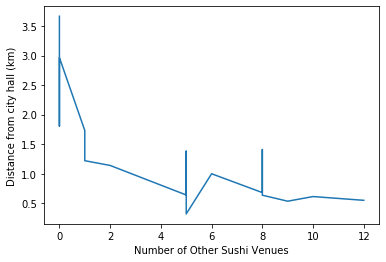

In [109]:
import matplotlib.pyplot as plt
plt.plot(df['Number of Other Sushi Venues'],df['Distance from city hall (km)'])
plt.ylabel("Distance from city hall (km)")
plt.xlabel("Number of Other Sushi Venues")
plt.show()
#there are a lot of sushi venues near city hall

### It seems that distance from city hall is inversely proportional to the number of sushi venues. The third criteria must act as a tie breaker.

### find number of five star restaurants in the area or shops

In [36]:
#cut out bottom of the list and then go through top neighborhoods using neighborhood ranking system

In [110]:
df.sort_values(by=['new Score'], axis=0,inplace=True)
df=df.reset_index(drop=True)

In [111]:
top_10=df.iloc[0:10]
top_10

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Distance from city hall (km),Number of Other Sushi Venues,new Score
0,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,0.318454,5,11
1,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0.639030,5,14
2,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049,1.372098,1,16
3,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1.219726,1,16
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1.139276,2,16
5,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420,2.850006,0,17
6,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,2.053917,0,17
7,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.803665,0,17
8,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,0.533808,9,17
9,M6G,Downtown Toronto,Christie,43.669542,-79.422564,3.665966,0,18


In [112]:
#analyze number M5H
search_query = 'Japanese'
radius = 500
print(search_query + ' .... OK!')


Japanese .... OK!


In [113]:
avg_ratings=[]

for neighborhood in main_id_list:
    neighborhood_ratings=[]
    for venue_id in neighborhood:
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
        result = requests.get(url).json()
        if 'venue' in result['response'].keys():
            if 'rating' in result['response']['venue'].keys():
                neighborhood_ratings.append(result['response']['venue']['rating'])
   
    if len(neighborhood_ratings)==0:
        avg_ratings.append("No ratings")
    else:
        avg_ratings.append(sum(neighborhood_ratings)/len(neighborhood_ratings))  

### Explore each location

In [73]:
# define URL
latitude=df.loc[2,"Latitude"]
longitude=df.loc[2,"Longitude"]


In [74]:
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f05d552427a8e08cff801af'},
 'response': {'venues': []}}

In [64]:
avg_ratings

[8.0, 'No ratings', 'No ratings', 'No ratings', 'No ratings', 'No ratings']

In [61]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [62]:
# display trending venues
trending_venues_df

'No trending venues are available at the moment!'

In [ ]:
if len(results['response']['venues']) == 0:
    venues_map = 'Cannot generate visual as no trending venues are available at the moment!'

else:
    venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


    # add Ecco as a red circle mark
    folium.features.CircleMarker(
        [latitude, longitude],
        radius=10,
        popup='Ecco',
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)


    # add the trending venues as blue circle markers
    for lat, lng, label in zip(trending_venues_df['location.lat'], trending_venues_df['location.lng'], trending_venues_df['name']):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            poup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)

In [ ]:
# display map
venues_map

In [116]:
main_id_list

[['4ae73054f964a5203ca921e3',
  '4afa1f33f964a520e91622e3',
  '4c9ccede8afca093659ef015',
  '4ae4b055f964a520229d21e3',
  '4beb2c0ba9900f475b7a1740'],
 ['4af63562f964a5203d0222e3',
  '574ad72238fa943556d93b8e',
  '4b4b60e5f964a520619926e3',
  '4b999927f964a5207c8635e3',
  '4beb2c0ba9900f475b7a1740'],
 ['4adf4011f964a520b97821e3'],
 ['4ae73054f964a5203ca921e3'],
 ['4ea341925c5cd12b3601d654', '4b5c7d3cf964a520653229e3'],
 ['4ae73054f964a5203ca921e3',
  '4af63562f964a5203d0222e3',
  '4c7a99b6794e224bc3026928',
  '4c9ccede8afca093659ef015',
  '57c76c1b498e26057391344c',
  '4afa1f33f964a520e91622e3',
  '4ad4c060f964a52087f720e3',
  '4beb2c0ba9900f475b7a1740',
  '4b999927f964a5207c8635e3']]

In [154]:
latitude0=df.loc[0,"Latitude"]
longitude0=df.loc[0,"Longitude"]
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude0, longitude0, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [155]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered0 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered0['categories'] = dataframe_filtered0.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered0.columns = [column.split('.')[-1] for column in dataframe_filtered0.columns]


In [156]:
latitude1=df.loc[1,"Latitude"]
longitude1=df.loc[1,"Longitude"]
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude1, longitude1, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered1 = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered1['categories'] = dataframe_filtered1.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered1.columns = [column.split('.')[-1] for column in dataframe_filtered1.columns]
dataframe_filtered1


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,neighborhood,id
0,Bikkuri Japanese,Sushi Restaurant,36 King St. E,at Victoria,43.649564,-79.376328,"[{'label': 'display', 'lat': 43.649564308142, ...",226,CA,Toronto,ON,Canada,"[36 King St. E (at Victoria), Toronto ON, Canada]",NaN,NaN,4af63562f964a5203d0222e3
1,Gyu-Kaku Japanese BBQ,Japanese Restaurant,81 Church St,at Adelaide St E,43.651422,-79.375047,"[{'label': 'display', 'lat': 43.65142227549791...",30,CA,Toronto,ON,Canada,"[81 Church St (at Adelaide St E), Toronto ON M...",M5C 2G2,NaN,574ad72238fa943556d93b8e
2,Sakura Ichiban Japanese Cuisine,Japanese Restaurant,142 Adelaide St. E.,NaN,43.651624,-79.372464,"[{'label': 'display', 'lat': 43.65162413928149...",238,CA,Toronto,ON,Canada,"[142 Adelaide St. E., Toronto ON M5C 1K9, Canada]",M5C 1K9,NaN,4b4b60e5f964a520619926e3
3,NAMI,Japanese Restaurant,55 Adelaide Street East,at Church street,43.650853,-79.375887,"[{'label': 'display', 'lat': 43.65085336178512...",80,CA,Toronto,ON,Canada,"[55 Adelaide Street East (at Church street), T...",M5C 1K6,NaN,4b999927f964a5207c8635e3
4,Ninki Sushi,Japanese Restaurant,40 King St W,at Bay St,43.649812,-79.379518,"[{'label': 'display', 'lat': 43.64981217424400...",379,CA,Toronto,ON,Canada,"[40 King St W (at Bay St), Toronto ON M5H 1A1,...",M5H 1A1,Financial District,4beb2c0ba9900f475b7a1740


In [157]:
latitude2=df.loc[2,"Latitude"]
longitude2=df.loc[2,"Longitude"]
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered2 = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
dataframe_filtered2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Aji Sai Japanese Restaurant,Sushi Restaurant,467 Queen St. W.,at Spadina Ave.,43.648498,-79.397469,"[{'label': 'display', 'lat': 43.64849829452195...",563,M5V 2A9,CA,Toronto,ON,Canada,"[467 Queen St. W. (at Spadina Ave.), Toronto O...",4adf4011f964a520b97821e3


In [159]:
latitude3=df.loc[3,"Latitude"]
longitude3=df.loc[3,"Longitude"]
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude3, longitude3, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered3 = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered3['categories'] = dataframe_filtered3.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered3.columns = [column.split('.')[-1] for column in dataframe_filtered3.columns]
dataframe_filtered3

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Ki Modern Japanese + Bar,Japanese Restaurant,181 Bay St,at Wellington St. W,43.647223,-79.379374,"[{'label': 'display', 'lat': 43.647223, 'lng':...",559,M5J 2T3,CA,Toronto,ON,Canada,"[181 Bay St (at Wellington St. W), Toronto ON ...",4ae73054f964a5203ca921e3


In [176]:
latitude4=df.loc[4,"Latitude"]
longitude4=df.loc[4,"Longitude"]
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude4, longitude4, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
dataframe = json_normalize(venues)
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered4 = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered4['categories'] = dataframe_filtered4.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered4.columns = [column.split('.')[-1] for column in dataframe_filtered4.columns]
dataframe_filtered4

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,id
0,Kenzo Japanese Noodle House,Ramen Restaurant,522 Yonge St,btwn Breadalbane & Grosvenor,43.663702,-79.384053,"[{'label': 'display', 'lat': 43.66370201195534...",465,CA,Toronto,ON,Canada,"[522 Yonge St (btwn Breadalbane & Grosvenor), ...",NaN,4ea341925c5cd12b3601d654
1,Sushi Sky,Sushi Restaurant,478 Yonge St.,NaN,43.662446,-79.383604,"[{'label': 'display', 'lat': 43.66244625914365...",474,CA,Toronto,ON,Canada,"[478 Yonge St., Toronto ON M4Y 1X5, Canada]",M4Y 1X5,4b5c7d3cf964a520653229e3


In [181]:
#first neighborhood

folium.features.CircleMarker(
    [latitude0, longitude0],
    radius=10,
    color='red',
    popup='Richmond,Adelaide, King',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered0.lat, dataframe_filtered0.lng, dataframe_filtered0.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# Second neighborhood
folium.features.CircleMarker(
    [latitude1, longitude1],
    radius=10,
    color='green',
    popup='St. James Town',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered1.lat, dataframe_filtered1.lng, dataframe_filtered1.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    
# Third neighborhood
folium.features.CircleMarker(
    [latitude2, longitude2],
    radius=10,
    color='yellow',
    popup='Kensington',
    fill = True,
    fill_color = 'yellow',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered2.lat, dataframe_filtered2.lng, dataframe_filtered2.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
venues_map

#fourth neighborhood

folium.features.CircleMarker(
    [latitude3, longitude3],
    radius=10,
    color='pink',
    popup='Richmond,Adelaide, King',
    fill = True,
    fill_color = 'pink',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered3.lat, dataframe_filtered3.lng, dataframe_filtered3.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='pink',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    
#fifth neighborhood

folium.features.CircleMarker(
    [latitude4, longitude4],
    radius=10,
    color='orange',
    popup='Berczy Park',
    fill = True,
    fill_color = 'orange',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered4.lat, dataframe_filtered4.lng, dataframe_filtered4.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='orange',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
venues_map